# DATA 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing research data
prep0 = pd.read_csv('reactor_data.csv')
prep0.head()

,Time,Running_cycle,FI-001,FI-002,TC-001,TC-002,DT-001,DT-002,DP-001,DP-002,...,TI-034,TI-035,TI-036,TI-037,TI-038,TI-039,TI-040,TI-041,TI-042,CONVERSION
0,6/29/2004 4:00,1,57.376325,669.985139,319.496265,270.298088,68.159380,42.059748,16.935505,0.967330,...,308.465166,293.210571,288.108362,312.395056,305.310342,303.123348,310.085243,309.464836,308.546075,93.200705
1,6/29/2004 4:00,2,57.415584,670.175315,319.506829,270.557335,68.149101,43.819212,16.906026,0.974280,...,310.060319,294.679554,289.054518,314.409080,307.335927,304.765668,311.408695,310.634102,309.389468,93.128145
2,6/29/2004 4:00,3,57.454843,670.365491,319.517393,270.816583,68.138821,45.578677,16.876548,0.981229,...,311.655473,296.148536,290.000675,316.423104,309.361511,306.407989,312.732147,311.803369,310.232862,93.055586
3,6/30/2004 0:00,4,57.543094,670.622632,319.553869,271.363961,68.380253,49.568133,16.811533,1.000760,...,315.280320,299.371886,292.082630,320.951668,313.762146,309.971053,315.635902,314.406282,312.107740,92.830864
4,6/30/2004 0:00,5,57.470024,670.828064,319.515243,270.964477,67.735901,45.934814,16.879419,0.977966,...,312.047943,296.581512,290.251892,316.915100,309.949554,306.832458,313.039825,312.000702,310.427032,93.200151


In [3]:
#Identity variables name
prep0.columns

Index(['Time', 'Running_cycle', 'FI-001', 'FI-002', 'TC-001', 'TC-002',
       'DT-001', 'DT-002', 'DP-001', 'DP-002', 'DP-003', 'DP-004', 'PI-001',
       'PI-002', 'PI-003', 'PI-004', 'AI-001', 'AI-002', 'AI-003', 'AI-004',
       'AI-005', 'AI-006', 'AI-007', 'AI-008', 'AI-009', 'AI-010', 'RX-001',
       'TI-001', 'TI-002', 'TI-005', 'TI-006', 'TI-007', 'TI-008', 'TI-009',
       'TI-010', 'TI-011', 'TI-012', 'TI-013', 'TI-014', 'TI-015', 'TI-018',
       'TI-019', 'TI-020', 'TI-021', 'TI-022', 'TI-023', 'TI-024', 'TI-025',
       'TI-026', 'TI-027', 'TI-028', 'TI-029', 'TI-030', 'TI-031', 'TI-032',
       'TI-033', 'TI-034', 'TI-035', 'TI-036', 'TI-037', 'TI-038', 'TI-039',
       'TI-040', 'TI-041', 'TI-042', 'CONVERSION'],
      dtype='object')

# DATA PREPARATION, CLEANING, AND FEATURE EXTRACTION

In [4]:
#Removing unused 'FI-002', 'NO', 'Time' column
prep1 = prep0.iloc[:, :].drop(['FI-001','Running_cycle','Time'], axis=1)
prep1

,FI-002,TC-001,TC-002,DT-001,DT-002,DP-001,DP-002,DP-003,DP-004,PI-001,...,TI-034,TI-035,TI-036,TI-037,TI-038,TI-039,TI-040,TI-041,TI-042,CONVERSION
0,669.985139,319.496265,270.298088,68.159380,42.059748,16.935505,0.967330,14.547414,32.450250,63.610362,...,308.465166,293.210571,288.108362,312.395056,305.310342,303.123348,310.085243,309.464836,308.546075,93.200705
1,670.175315,319.506829,270.557335,68.149101,43.819212,16.906026,0.974280,14.532135,32.412441,63.569363,...,310.060319,294.679554,289.054518,314.409080,307.335927,304.765668,311.408695,310.634102,309.389468,93.128145
2,670.365491,319.517393,270.816583,68.138821,45.578677,16.876548,0.981229,14.516856,32.374633,63.528364,...,311.655473,296.148536,290.000675,316.423104,309.361511,306.407989,312.732147,311.803369,310.232862,93.055586
3,670.622632,319.553869,271.363961,68.380253,49.568133,16.811533,1.000760,14.494793,32.307087,63.432052,...,315.280320,299.371886,292.082630,320.951668,313.762146,309.971053,315.635902,314.406282,312.107740,92.830864
4,670.828064,319.515243,270.964477,67.735901,45.934814,16.879419,0.977966,14.471894,32.329281,63.531145,...,312.047943,296.581512,290.251892,316.915100,309.949554,306.832458,313.039825,312.000702,310.427032,93.200151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18718,833.271973,323.390320,286.120880,67.911438,33.537292,20.344055,0.065580,20.184771,40.909565,70.437078,...,312.373871,301.223907,304.223450,299.636078,304.582642,300.072601,290.822022,289.512878,291.541504,94.829638
18719,832.827393,323.574768,286.037537,67.504608,33.254303,20.169985,0.066432,20.349388,40.900963,70.312330,...,312.328278,301.028229,304.057129,299.530151,304.531738,300.036346,290.642395,289.317627,291.300690,94.831773
18720,833.848450,323.598389,286.136810,67.682678,33.338257,20.028092,0.126205,20.386351,40.855808,70.336130,...,312.472900,301.012054,304.044495,299.594665,304.567383,300.047790,290.718109,289.436035,291.387756,94.878506
18721,833.529907,323.480347,286.043396,67.667175,32.947021,20.317225,0.075650,20.188131,40.896164,70.413744,...,312.350281,301.124390,304.156006,299.460388,304.473602,299.988190,290.674011,289.329468,291.345581,94.495033


In [5]:
#Convert timestamp object data to numerical
prep2 = prep1.apply(pd.to_numeric)
print(prep2.dtypes, prep2.shape)

FI-002        float64
TC-001        float64
TC-002        float64
DT-001        float64
DT-002        float64
               ...   
TI-039        float64
TI-040        float64
TI-041        float64
TI-042        float64
CONVERSION    float64
Length: 63, dtype: object (18723, 63)


In [6]:
#Check if there's missing value
prep2.isnull().sum()

FI-002        0
TC-001        0
TC-002        0
DT-001        0
DT-002        0
             ..
TI-039        0
TI-040        0
TI-041        0
TI-042        0
CONVERSION    0
Length: 63, dtype: int64

<AxesSubplot:xlabel='FI-002'>

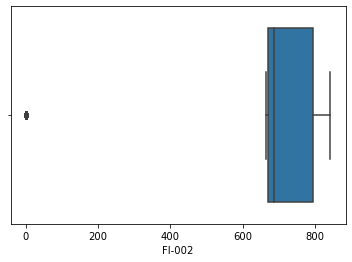

In [7]:
#Removing data where plant is not run, by identifying total raw material 'FI-001' loss flow rate
sns.boxplot(data=prep2,x=prep2['FI-002'])

In [8]:
#Remove shut down data by identifying outlier FI-001 with Inter Quantile Range Method

from numpy import percentile
# calculate interquartile range
q25_a, q75_a = percentile(prep2['FI-002'], 25), percentile(prep2['FI-002'], 75)
iqr_a = q75_a - q25_a
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25_a, q75_a, iqr_a))
# calculate the outlier cutoff
cut_off_a = iqr_a * 1.5
lower_a, upper_a = q25_a - cut_off_a, q75_a + cut_off_a
print('Lower whisker=%.2f, Upper whisker=%.2f' % (lower_a, upper_a))
# identify outliers
shut_down_data = prep2[(prep2['FI-002']<lower_a)|(prep2['FI-002']>upper_a)]
print('Shut down data: %d' % len(shut_down_data))
# remove outliers
shut_down_removed = prep2[(prep2['FI-002']>lower_a)&(prep2['FI-002']<upper_a)]
print('Non-Shut down data: %d' % len(shut_down_removed))

Percentiles: 25th=670.419, 75th=794.510, IQR=124.090
Lower whisker=484.28, Upper whisker=980.65
Shut down data: 2510
Non-Shut down data: 16213


<AxesSubplot:xlabel='FI-002'>

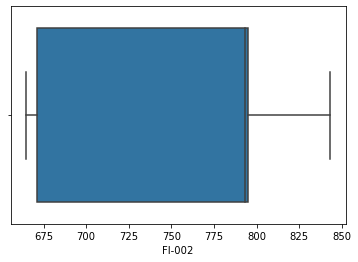

In [9]:
#Check again if there's still outlier in 'FI-001'
sns.boxplot(data=shut_down_removed, x=shut_down_removed['FI-002'])

In [10]:
prep3 = shut_down_removed
prep3.shape

(16213, 63)

In [11]:
#Remove outlier for all variables while keeps the whole row intact
lb = prep3.quantile(0.01)
ub = prep3.quantile(0.99)

prep4 = prep3[(prep3 > lb) & (prep3 < ub)]
prep4

,FI-002,TC-001,TC-002,DT-001,DT-002,DP-001,DP-002,DP-003,DP-004,PI-001,...,TI-034,TI-035,TI-036,TI-037,TI-038,TI-039,TI-040,TI-041,TI-042,CONVERSION
0,669.985139,319.496265,270.298088,68.159380,42.059748,16.935505,0.967330,14.547414,32.450250,63.610362,...,308.465166,293.210571,288.108362,312.395056,305.310342,303.123348,310.085243,309.464836,308.546075,93.200705
1,670.175315,319.506829,270.557335,68.149101,43.819212,16.906026,0.974280,14.532135,32.412441,63.569363,...,310.060319,294.679554,289.054518,314.409080,307.335927,304.765668,311.408695,310.634102,309.389468,93.128145
2,670.365491,319.517393,270.816583,68.138821,45.578677,16.876548,0.981229,14.516856,32.374633,63.528364,...,311.655473,296.148536,290.000675,316.423104,309.361511,306.407989,312.732147,311.803369,310.232862,93.055586
3,670.622632,319.553869,271.363961,68.380253,49.568133,16.811533,1.000760,14.494793,32.307087,63.432052,...,315.280320,299.371886,292.082630,320.951668,313.762146,309.971053,315.635902,314.406282,312.107740,92.830864
4,670.828064,319.515243,270.964477,67.735901,45.934814,16.879419,0.977966,14.471894,32.329281,63.531145,...,312.047943,296.581512,290.251892,316.915100,309.949554,306.832458,313.039825,312.000702,310.427032,93.200151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18718,833.271973,323.390320,286.120880,67.911438,33.537292,20.344055,0.065580,20.184771,40.909565,70.437078,...,312.373871,301.223907,304.223450,299.636078,304.582642,300.072601,290.822022,289.512878,291.541504,94.829638
18719,832.827393,323.574768,286.037537,67.504608,33.254303,20.169985,0.066432,20.349388,40.900963,70.312330,...,312.328278,301.028229,304.057129,299.530151,304.531738,300.036346,290.642395,289.317627,291.300690,94.831773
18720,833.848450,323.598389,286.136810,67.682678,33.338257,20.028092,0.126205,20.386351,40.855808,70.336130,...,312.472900,301.012054,304.044495,299.594665,304.567383,300.047790,290.718109,289.436035,291.387756,94.878506
18721,833.529907,323.480347,286.043396,67.667175,32.947021,20.317225,0.075650,20.188131,40.896164,70.413744,...,312.350281,301.124390,304.156006,299.460388,304.473602,299.988190,290.674011,289.329468,291.345581,94.495033


In [12]:
prep4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16213 entries, 0 to 18722
Data columns (total 63 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FI-002      15887 non-null  float64
 1   TC-001      15886 non-null  float64
 2   TC-002      15887 non-null  float64
 3   DT-001      15886 non-null  float64
 4   DT-002      15888 non-null  float64
 5   DP-001      15886 non-null  float64
 6   DP-002      15816 non-null  float64
 7   DP-003      15885 non-null  float64
 8   DP-004      15886 non-null  float64
 9   PI-001      15886 non-null  float64
 10  PI-002      15886 non-null  float64
 11  PI-003      15887 non-null  float64
 12  PI-004      15887 non-null  float64
 13  AI-001      15887 non-null  float64
 14  AI-002      15887 non-null  float64
 15  AI-003      15887 non-null  float64
 16  AI-004      15887 non-null  float64
 17  AI-005      15851 non-null  float64
 18  AI-006      15887 non-null  float64
 19  AI-007      15887 non-nul

<AxesSubplot:>

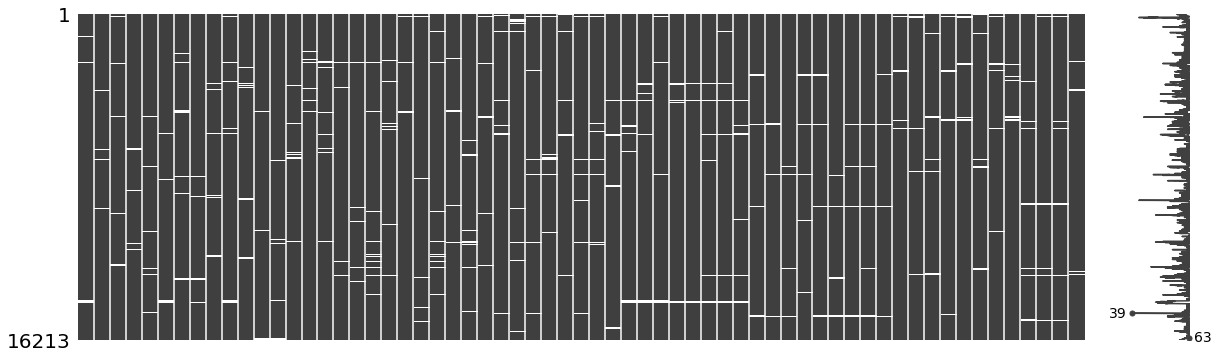

In [13]:
#Check deleted value position
import missingno as mno
mno.matrix(prep4, figsize = (20, 6))

In [14]:
#Fill missing value (from removed outlier) with imputer
prep5 = prep4.interpolate(method ='linear', limit_direction ='forward')
prep5.head()

,FI-002,TC-001,TC-002,DT-001,DT-002,DP-001,DP-002,DP-003,DP-004,PI-001,...,TI-034,TI-035,TI-036,TI-037,TI-038,TI-039,TI-040,TI-041,TI-042,CONVERSION
0,669.985139,319.496265,270.298088,68.159380,42.059748,16.935505,0.967330,14.547414,32.450250,63.610362,...,308.465166,293.210571,288.108362,312.395056,305.310342,303.123348,310.085243,309.464836,308.546075,93.200705
1,670.175315,319.506829,270.557335,68.149101,43.819212,16.906026,0.974280,14.532135,32.412441,63.569363,...,310.060319,294.679554,289.054518,314.409080,307.335927,304.765668,311.408695,310.634102,309.389468,93.128145
2,670.365491,319.517393,270.816583,68.138821,45.578677,16.876548,0.981229,14.516856,32.374633,63.528364,...,311.655473,296.148536,290.000675,316.423104,309.361511,306.407989,312.732147,311.803369,310.232862,93.055586
3,670.622632,319.553869,271.363961,68.380253,49.568133,16.811533,1.000760,14.494793,32.307087,63.432052,...,315.280320,299.371886,292.082630,320.951668,313.762146,309.971053,315.635902,314.406282,312.107740,92.830864
4,670.828064,319.515243,270.964477,67.735901,45.934814,16.879419,0.977966,14.471894,32.329281,63.531145,...,312.047943,296.581512,290.251892,316.915100,309.949554,306.832458,313.039825,312.000702,310.427032,93.200151


In [15]:
prep5.isnull().sum()

FI-002        0
TC-001        0
TC-002        0
DT-001        0
DT-002        0
             ..
TI-039        0
TI-040        0
TI-041        0
TI-042        0
CONVERSION    0
Length: 63, dtype: int64

In [16]:
prep5.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FI-002,16213.0,746.679192,68.974394,668.778687,671.182739,793.192139,794.781494,836.910889
TC-001,16213.0,322.950928,5.226784,312.015381,319.500427,322.585754,326.562042,334.638306
TC-002,16213.0,278.760113,6.484141,266.984192,273.608520,278.874756,284.130310,292.542786
DT-001,16213.0,66.416289,6.934921,51.402039,62.645111,67.749573,71.104828,80.546149
DT-002,16213.0,37.237985,11.090657,22.402069,28.286957,34.591809,43.110779,69.457214
...,...,...,...,...,...,...,...,...
TI-039,16213.0,304.102563,7.659816,288.000122,298.397888,304.587952,309.892517,320.615326
TI-040,16213.0,305.790454,14.960208,278.586883,291.905914,307.346619,316.723419,336.157837
TI-041,16213.0,307.477383,14.811054,281.091980,294.418945,307.079346,319.622864,336.463501
TI-042,16213.0,304.674310,16.186075,277.008789,290.616974,303.848419,318.172211,335.618439


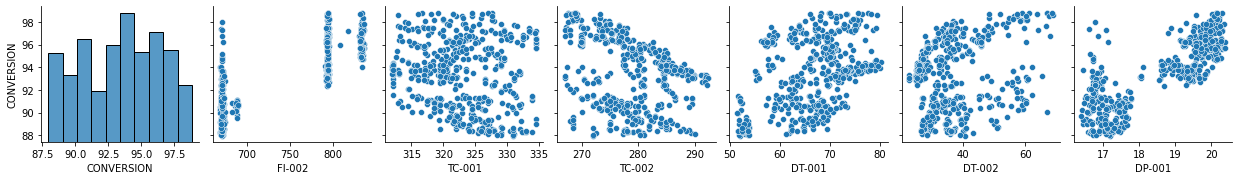

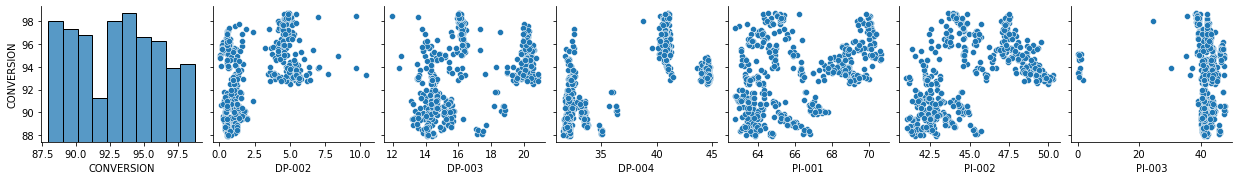

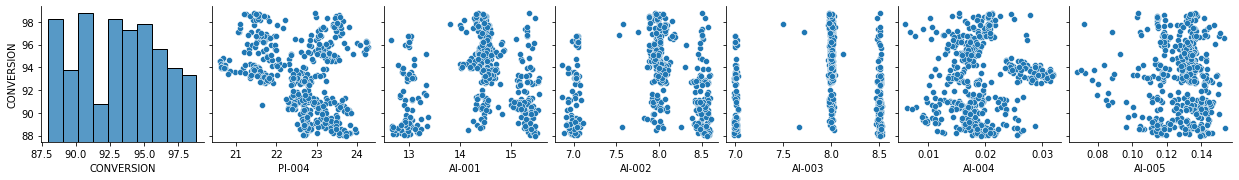

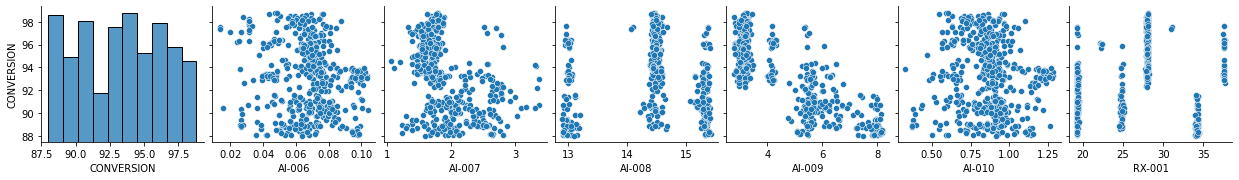

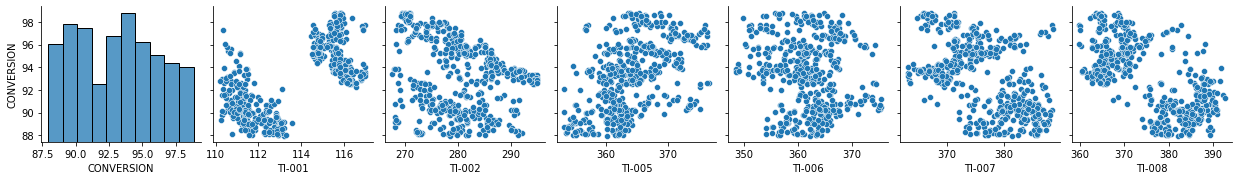

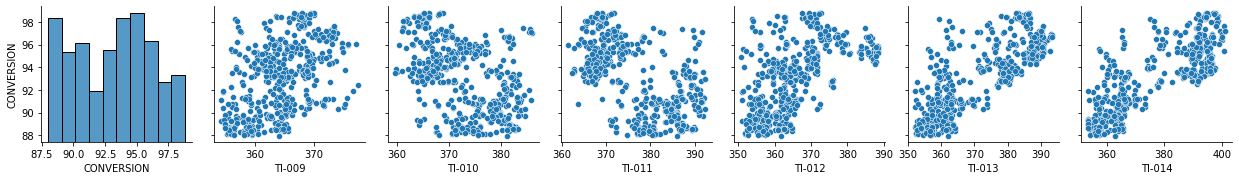

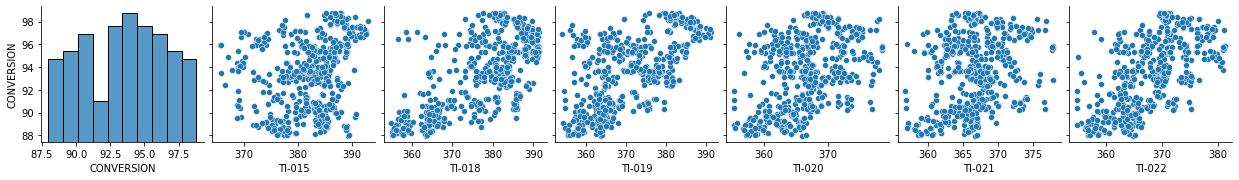

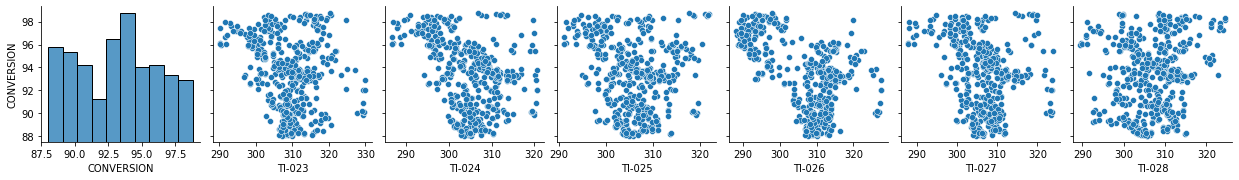

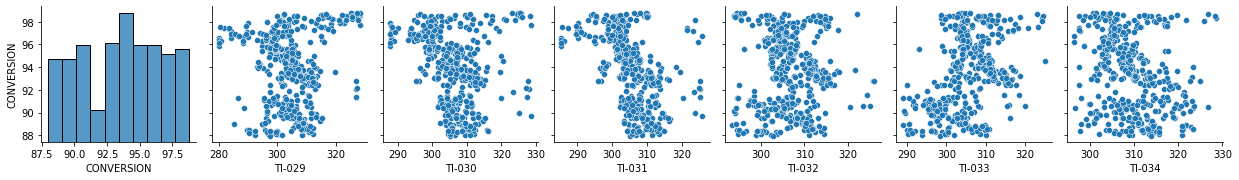

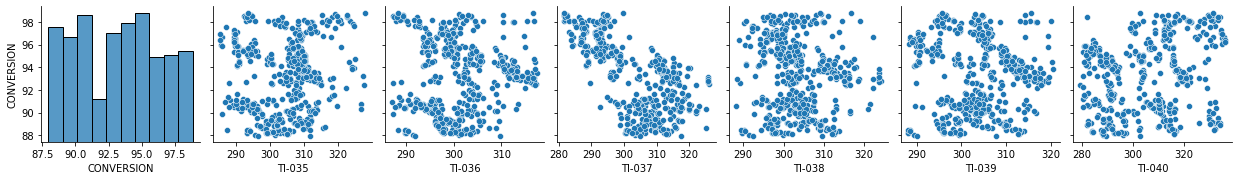

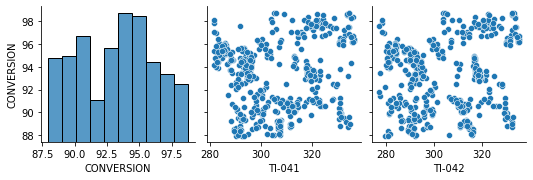

In [17]:
#Pairplot each predictor to target
sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','FI-002', 'TC-001', 'TC-002','DT-001', 'DT-002','DP-001'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','DP-002', 'DP-003', 'DP-004', 'PI-001','PI-002', 'PI-003'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION', 'PI-004', 'AI-001', 'AI-002','AI-003', 'AI-004','AI-005'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION', 'AI-006', 'AI-007','AI-008', 'AI-009', 'AI-010', 'RX-001'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION', 'TI-001','TI-002','TI-005', 'TI-006', 'TI-007', 'TI-008'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','TI-009','TI-010', 'TI-011', 'TI-012', 'TI-013','TI-014'],
    y_vars = ['CONVERSION'])
    
sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION', 'TI-015', 'TI-018','TI-019', 'TI-020', 'TI-021', 'TI-022'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','TI-023', 'TI-024', 'TI-025', 'TI-026', 'TI-027', 'TI-028'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION', 'TI-029', 'TI-030', 'TI-031', 'TI-032','TI-033', 'TI-034'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','TI-035', 'TI-036', 'TI-037', 'TI-038', 'TI-039','TI-040'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','TI-041', 'TI-042'],
    y_vars = ['CONVERSION'])

In [18]:
#Correlation matrix after data imputation
corr2 = prep5.corr()
corr2.style.background_gradient(cmap='coolwarm')

In [19]:
#Data Scaling with normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaled_data = pd.DataFrame(scaler.fit_transform(prep5), columns = prep5.columns)
print(scaled_data)

         FI-002    TC-001    TC-002    DT-001    DT-002    DP-001    DP-002  \
0      0.007176  0.330677  0.129659  0.574982  0.417758  0.137982  0.091838   
1      0.008307  0.331144  0.139802  0.574629  0.455150  0.130618  0.092498   
2      0.009438  0.331611  0.149945  0.574277  0.492541  0.123254  0.093158   
3      0.010967  0.333223  0.171362  0.582561  0.577324  0.107012  0.095012   
4      0.012189  0.331516  0.155732  0.560452  0.500110  0.123971  0.092848   
...         ...       ...       ...       ...       ...       ...       ...   
16208  0.978357  0.502806  0.748738  0.566475  0.236642  0.989480  0.006215   
16209  0.975713  0.510959  0.745477  0.552515  0.230628  0.945995  0.006296   
16210  0.981786  0.512003  0.749361  0.558625  0.232412  0.910548  0.011972   
16211  0.979891  0.506785  0.745706  0.558093  0.224098  0.982777  0.007171   
16212  0.979891  0.506785  0.745706  0.558093  0.224098  0.982777  0.007171   

         DP-003    DP-004    PI-001  ...    TI-034 

In [20]:
# Pearson correlation coefficient
select_corr = scaled_data.corr()["CONVERSION"].sort_values(ascending=False)[1:]

# absolute for positive values
abs_corr = abs(select_corr)

# random threshold for features to keep
selected_features = abs_corr[abs_corr>0.4]
selected_features

DP-001    0.807746
FI-002    0.806157
TI-014    0.795037
TI-013    0.764606
TI-018    0.700174
DP-004    0.675512
TI-001    0.667385
TI-019    0.647600
TI-022    0.644449
DT-001    0.544135
TI-012    0.542178
DP-002    0.530594
PI-002    0.473997
TI-005    0.472168
TI-020    0.465437
PI-001    0.430794
TI-024    0.408135
AI-007    0.462468
TI-010    0.487901
TI-007    0.495802
TI-031    0.504460
TI-026    0.542696
TI-011    0.582506
TI-008    0.608041
TI-037    0.676970
AI-009    0.797870
Name: CONVERSION, dtype: float64

In [21]:
len(selected_features)

26

In [22]:
# Drop low correlation features
prep6 = scaled_data[selected_features.index].interpolate(method ='linear', limit_direction ='backward')
prep6.isnull().sum()

DP-001    0
FI-002    0
TI-014    0
TI-013    0
TI-018    0
DP-004    0
TI-001    0
TI-019    0
TI-022    0
DT-001    0
TI-012    0
DP-002    0
PI-002    0
TI-005    0
TI-020    0
PI-001    0
TI-024    0
AI-007    0
TI-010    0
TI-007    0
TI-031    0
TI-026    0
TI-011    0
TI-008    0
TI-037    0
AI-009    0
dtype: int64

In [23]:
y_lasso = scaled_data["CONVERSION"]
X_lasso = prep6

In [24]:
#Eliminate multicollinearity by removing irrelavant features with ebbedded method
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X_lasso, y_lasso)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_lasso,y_lasso))
coef = pd.Series(reg.coef_, index = X_lasso.columns)

Best alpha using built-in LassoCV: 0.000093
Best score using built-in LassoCV: 0.933171


In [25]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 23 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

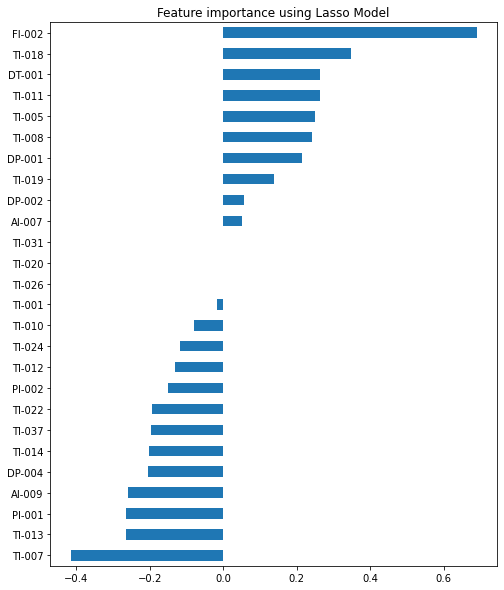

In [26]:
#Visualize important feature
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [27]:
#Select relevant reatures
abs_coef = abs(coef)
relevant_features = abs_coef[abs_coef>0]
prep7 = prep6[relevant_features.index].sort_index(axis=1, ascending=True)
prep7['CONVERSION'] = scaled_data["CONVERSION"]
prep7.shape

(16213, 24)

In [28]:
#Showing correlation between relevant features
corr3 = prep7.corr().style.background_gradient(cmap='coolwarm')
corr3

,AI-007,AI-009,DP-001,DP-002,DP-004,DT-001,FI-002,PI-001,PI-002,TI-001,TI-005,TI-007,TI-008,TI-010,TI-011,TI-012,TI-013,TI-014,TI-018,TI-019,TI-022,TI-024,TI-037,CONVERSION
AI-007,1.000000,0.508171,-0.605068,-0.365598,-0.598543,-0.329122,-0.633123,-0.380027,-0.473995,-0.630089,-0.390715,0.496358,0.633507,0.485211,0.611309,-0.421666,-0.604346,-0.610053,-0.352382,-0.425173,-0.502453,0.286689,0.343341,-0.462468
AI-009,0.508171,1.000000,-0.899661,-0.620813,-0.894308,-0.743551,-0.895437,-0.711594,-0.792831,-0.752550,-0.576772,0.441013,0.658815,0.488060,0.633110,-0.616926,-0.874695,-0.924246,-0.692661,-0.730534,-0.771141,0.188240,0.437556,-0.797870
DP-001,-0.605068,-0.899661,1.000000,0.620755,0.889258,0.539755,0.965602,0.706694,0.738625,0.881947,0.492134,-0.567006,-0.808451,-0.608148,-0.773423,0.621358,0.891708,0.913155,0.601093,0.716365,0.745159,-0.354156,-0.621459,0.807746
DP-002,-0.365598,-0.620813,0.620755,1.000000,0.722134,0.456555,0.640760,0.588011,0.645439,0.725394,0.308169,-0.622378,-0.619462,-0.727030,-0.678629,0.003394,0.527995,0.707311,0.388921,0.694828,0.599367,-0.100517,-0.166654,0.530594
DP-004,-0.598543,-0.894308,0.889258,0.722134,1.000000,0.607239,0.909023,0.723330,0.883843,0.913648,0.429869,-0.648597,-0.812200,-0.677713,-0.811741,0.460695,0.808411,0.907286,0.585408,0.640425,0.660184,-0.140233,-0.374423,0.675512
DT-001,-0.329122,-0.743551,0.539755,0.456555,0.607239,1.000000,0.530917,0.536242,0.590392,0.355050,0.414796,-0.220331,-0.330181,-0.271744,-0.304564,0.334746,0.570736,0.655155,0.457136,0.534459,0.512240,0.131472,-0.095858,0.544135
FI-002,-0.633123,-0.895437,0.965602,0.640760,0.909023,0.530917,1.000000,0.757240,0.810297,0.901855,0.474443,-0.613811,-0.828346,-0.644734,-0.809575,0.611593,0.894242,0.928547,0.648715,0.696366,0.735951,-0.336182,-0.585382,0.806157
PI-001,-0.380027,-0.711594,0.706694,0.588011,0.723330,0.536242,0.757240,1.000000,0.900401,0.608901,0.371899,-0.400631,-0.563919,-0.509155,-0.587717,0.382584,0.675045,0.723003,0.503509,0.677317,0.632747,-0.043757,-0.161847,0.430794
PI-002,-0.473995,-0.792831,0.738625,0.645439,0.883843,0.590392,0.810297,0.900401,1.000000,0.741510,0.375364,-0.515149,-0.664529,-0.577960,-0.686526,0.399252,0.704911,0.794443,0.552277,0.600037,0.604474,0.015895,-0.156943,0.473997
TI-001,-0.630089,-0.752550,0.881947,0.725394,0.913648,0.355050,0.901855,0.608901,0.741510,1.000000,0.329103,-0.746413,-0.887895,-0.769282,-0.890285,0.376772,0.746975,0.837916,0.458846,0.591936,0.610212,-0.310427,-0.511568,0.667385


In [29]:
#Drop high correlation variables among predictor
prep8 = prep7.drop(['FI-002', 'TI-001','TI-007', 'TI-010', 'TI-011', 'TI-014', 'PI-001'], axis = 1)

In [30]:
#Showing correlation between relevant features
corr4 = prep8.corr().style.background_gradient(cmap='coolwarm')
corr4

,AI-007,AI-009,DP-001,DP-002,DP-004,DT-001,PI-002,TI-005,TI-008,TI-012,TI-013,TI-018,TI-019,TI-022,TI-024,TI-037,CONVERSION
AI-007,1.000000,0.508171,-0.605068,-0.365598,-0.598543,-0.329122,-0.473995,-0.390715,0.633507,-0.421666,-0.604346,-0.352382,-0.425173,-0.502453,0.286689,0.343341,-0.462468
AI-009,0.508171,1.000000,-0.899661,-0.620813,-0.894308,-0.743551,-0.792831,-0.576772,0.658815,-0.616926,-0.874695,-0.692661,-0.730534,-0.771141,0.188240,0.437556,-0.797870
DP-001,-0.605068,-0.899661,1.000000,0.620755,0.889258,0.539755,0.738625,0.492134,-0.808451,0.621358,0.891708,0.601093,0.716365,0.745159,-0.354156,-0.621459,0.807746
DP-002,-0.365598,-0.620813,0.620755,1.000000,0.722134,0.456555,0.645439,0.308169,-0.619462,0.003394,0.527995,0.388921,0.694828,0.599367,-0.100517,-0.166654,0.530594
DP-004,-0.598543,-0.894308,0.889258,0.722134,1.000000,0.607239,0.883843,0.429869,-0.812200,0.460695,0.808411,0.585408,0.640425,0.660184,-0.140233,-0.374423,0.675512
DT-001,-0.329122,-0.743551,0.539755,0.456555,0.607239,1.000000,0.590392,0.414796,-0.330181,0.334746,0.570736,0.457136,0.534459,0.512240,0.131472,-0.095858,0.544135
PI-002,-0.473995,-0.792831,0.738625,0.645439,0.883843,0.590392,1.000000,0.375364,-0.664529,0.399252,0.704911,0.552277,0.600037,0.604474,0.015895,-0.156943,0.473997
TI-005,-0.390715,-0.576772,0.492134,0.308169,0.429869,0.414796,0.375364,1.000000,-0.223338,0.663101,0.721532,0.567874,0.692503,0.869386,-0.326888,-0.236536,0.471386
TI-008,0.633507,0.658815,-0.808451,-0.619462,-0.812200,-0.330181,-0.664529,-0.223338,1.000000,-0.324047,-0.680916,-0.363761,-0.555022,-0.518661,0.317664,0.509761,-0.608041
TI-012,-0.421666,-0.616926,0.621358,0.003394,0.460695,0.334746,0.399252,0.663101,-0.324047,1.000000,0.807006,0.691695,0.480650,0.593642,-0.248633,-0.468822,0.542178


In [31]:
# Pearson correlation coefficient
corr_final_feat = prep8.corr()["CONVERSION"].sort_values(ascending=False)[1:]

# absolute for positive values
abs_corr_final = abs(corr_final_feat)

print(abs_corr_final)

DP-001    0.807746
TI-013    0.764606
TI-018    0.700174
DP-004    0.675512
TI-019    0.647600
TI-022    0.644449
DT-001    0.544135
TI-012    0.542178
DP-002    0.530594
PI-002    0.473997
TI-005    0.471386
TI-024    0.408135
AI-007    0.462468
TI-008    0.608041
TI-037    0.676970
AI-009    0.797870
Name: CONVERSION, dtype: float64


In [32]:
prep8.describe()

,AI-007,AI-009,DP-001,DP-002,DP-004,DT-001,PI-002,TI-005,TI-008,TI-012,TI-013,TI-018,TI-019,TI-022,TI-024,TI-037,CONVERSION
count,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000
mean,0.344613,0.346348,0.530719,0.244814,0.464081,0.515173,0.440587,0.472970,0.448470,0.406076,0.503894,0.607074,0.444170,0.495458,0.521960,0.482083,0.491219
std,0.161072,0.311541,0.344385,0.215015,0.365870,0.237953,0.284654,0.220095,0.268006,0.240323,0.292610,0.270313,0.253621,0.233386,0.191360,0.242921,0.281156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240180,0.074240,0.159918,0.058720,0.055099,0.385775,0.176755,0.334918,0.201664,0.241212,0.227581,0.377764,0.250587,0.324455,0.409749,0.262745,0.235998
50%,0.290550,0.244595,0.692077,0.117396,0.676352,0.560921,0.385582,0.459779,0.359732,0.354211,0.550594,0.692458,0.409205,0.509707,0.533446,0.510281,0.510707
75%,0.415732,0.544039,0.853240,0.452093,0.713119,0.676047,0.700792,0.616159,0.681762,0.533615,0.760995,0.810577,0.640118,0.651880,0.655715,0.680016,0.717906
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
prep8.columns

Index(['AI-007', 'AI-009', 'DP-001', 'DP-002', 'DP-004', 'DT-001', 'PI-002',
       'TI-005', 'TI-008', 'TI-012', 'TI-013', 'TI-018', 'TI-019', 'TI-022',
       'TI-024', 'TI-037', 'CONVERSION'],
      dtype='object')

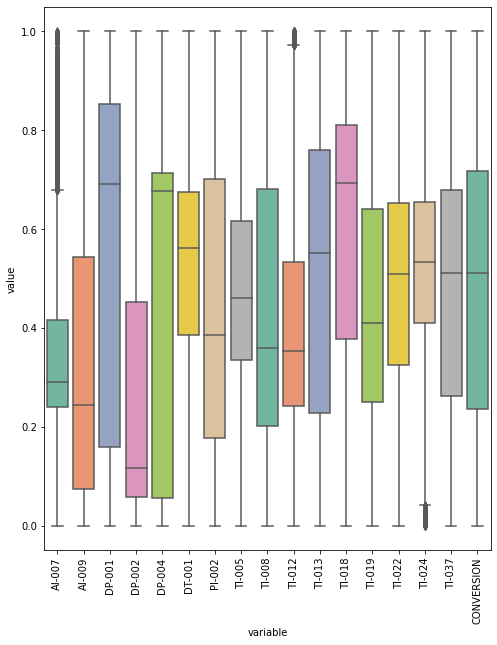

In [34]:
all_boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(pd.DataFrame(data=scaled_data, 
        columns=['AI-007', 'AI-009', 'DP-001', 'DP-002', 'DP-004', 'DT-001',
       'PI-002', 'TI-005', 'TI-008', 'TI-012', 'TI-013', 'TI-018', 'TI-019',
       'TI-022', 'TI-024', 'TI-037', 'CONVERSION'])), linewidth=1.5, palette="Set2")
plt.setp(all_boxplot.get_xticklabels(), rotation=90)
plt.show()

In [35]:
len(prep8.columns)

17

In [36]:
#Select data for predictors and target

#Import the features
X_df = prep8.drop('CONVERSION', axis = 1)
X = prep8.drop('CONVERSION', axis = 1).values.astype(float).reshape(-1, len(prep8.columns)-1)

# Extract the target
y_df = prep8['CONVERSION']
y = prep8['CONVERSION'].values.astype(float)

print(X.shape, y.shape)

(16213, 16) (16213,)


In [37]:
#Create function to return conversion scale for later use
def return_conversion_scale(variable_plot):
    minimum = min(prep5['CONVERSION'])
    maximum = max(prep5['CONVERSION'])
    return ((variable_plot - min(variable_plot)) /(max(variable_plot) - min(variable_plot)))*(maximum-minimum)+minimum

Observations: 16213
Training Observations: 13781
Testing Observations: 2432


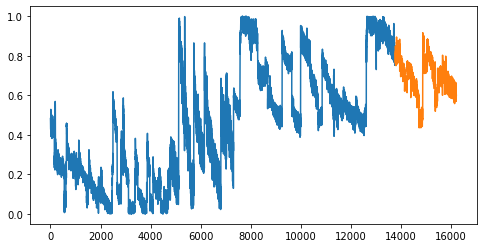

In [38]:
#Divide data into training 70%, validation 15% and testing 15%
#In this first step, we will divide data which will be used to train the model and as prediction
#1st splitting : training (85%); testing (15%)
y_tr_size = int(len(y) * 0.85)
y_tr, y_test = y[0:y_tr_size], y[y_tr_size:len(y)]
X_tr_size = int(len(X) * 0.85)
X_tr, X_test = X[0:X_tr_size], X[X_tr_size:len(X)]
print('Observations: %d' % (len(y)))
print('Training Observations: %d' % (len(y_tr)))
print('Testing Observations: %d' % (len(y_test)))
plt.subplots(figsize=(8,4))
plt.plot(y_tr)
plt.plot([None for i in y_tr] + [X for X in y_test])
plt.show()

In [39]:
print('Training Features Shape:', X_tr.shape)
print('Training Targets Shape:', X_test.shape)
print('Testing Features Shape:', y_tr.shape)
print('Testing Targets Shape:', y_test.shape)

Training Features Shape: (13781, 16)
Training Targets Shape: (2432, 16)
Testing Features Shape: (13781,)
Testing Targets Shape: (2432,)


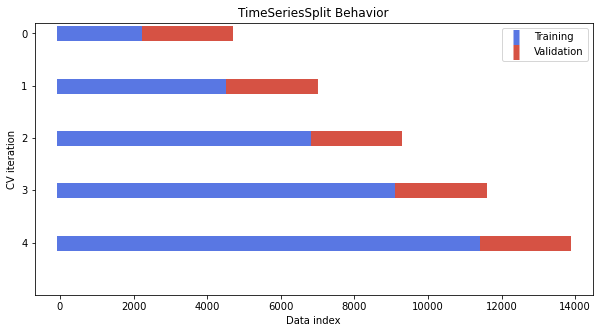

In [40]:
#Import and initialize the cross-validation iterator
#In the second step, we split training data from 1st step into training (80%); validation (20%)
from sklearn.model_selection import TimeSeriesSplit

n_splits = 5
ts_split = TimeSeriesSplit(n_splits)

fig, ax = plt.subplots(figsize=(10,5))
for ii, (tr, tt) in enumerate(ts_split.split(X_tr, y_tr)):
    
    #Plot training and testing indices
    l1 = ax.scatter(tr, [ii] * len(tr), c=[plt.cm.coolwarm(.1)],
                    marker='_', lw=15)
    l2 = ax.scatter(tt, [ii] * len(tt), c=[plt.cm.coolwarm(.9)],
                    marker='_', lw=15)
    ax.set(ylim=[n_splits, -.2], yticks=np.arange(n_splits), title='TimeSeriesSplit Behavior', xlabel='Data index', ylabel='CV iteration')
    ax.legend([l1, l2], ['Training', 'Validation'])

In [41]:
for train_index, test_index in ts_split.split(X_tr, y_tr):
     print("TRAIN:", train_index, "TEST:", test_index)

     #To get the indices 
     X_train, X_val = X_tr[train_index], X_tr[test_index]
     y_train, y_val = y_tr[train_index], y_tr[test_index]

TRAIN: [   0    1    2 ... 2298 2299 2300] TEST: [2301 2302 2303 ... 4594 4595 4596]
TRAIN: [   0    1    2 ... 4594 4595 4596] TEST: [4597 4598 4599 ... 6890 6891 6892]
TRAIN: [   0    1    2 ... 6890 6891 6892] TEST: [6893 6894 6895 ... 9186 9187 9188]
TRAIN: [   0    1    2 ... 9186 9187 9188] TEST: [ 9189  9190  9191 ... 11482 11483 11484]
TRAIN: [    0     1     2 ... 11482 11483 11484] TEST: [11485 11486 11487 ... 13778 13779 13780]


In [42]:
print('Training Features Shape:', X_train.shape)
print('Training Targets Shape:', y_train.shape)
print('Validation Features Shape:', X_val.shape)
print('Validation Targets Shape:', y_val.shape)

Training Features Shape: (11485, 16)
Training Targets Shape: (11485,)
Validation Features Shape: (2296, 16)
Validation Targets Shape: (2296,)


In [43]:
#Measurement metrics for inverted scale
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from math import log
    
def model_metrics(actual, predict):
    ac = return_conversion_scale(actual)
    pr = return_conversion_scale(predict)
    print('Mean Absolute Error:', metrics.mean_absolute_error(ac, pr))
    print('Mean Squared Error:', metrics.mean_squared_error(ac, pr))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ac, pr)))
    print('Coefficient of Determination:', r2_score(actual, predict)) 
    
    # calculate aic for regression
    lr_model = LinearRegression()
    lr_model.fit(pr.reshape(-1, 1), ac.reshape(-1, 1))
    # number of parameters
    num_params = len(lr_model.coef_) + 1
    # predict the training set
    yhat = lr_model.predict(pr.reshape(-1, 1))
    # calculate the error
    mse = metrics.mean_squared_error(ac, yhat)
    # calculate the aic
    aic = len(ac) * log(mse) + 2 * num_params
    print('Akaike Information Criterion: %.3f' % aic)
    
    # calculate bic for regression
    bic = len(ac) * log(mse) + num_params * log(len(ac))
    print('Bayesian Information Criterion: %.3f' % bic)

# RNN - LSTM

In [45]:
#Import RNN-LSTM library
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import GridSearchCV

In [46]:
#Reshape data into 3D input
X_train_adj = X_train.reshape((X_train.shape[0], 1, X_train.shape[1])) #reshape (adjust) train shape to 3 dimensional
X_val_adj  = X_val.reshape((X_val.shape[0], 1, X_val.shape[1])) #reshape (adjust) test shape to 3 dimensional
print(X_train_adj.shape, X_val_adj.shape, y_train.shape, y_val.shape )

(11485, 1, 16) (2296, 1, 16) (11485,) (2296,)


In [ ]:
#Build the model
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(75, return_sequences = True, input_shape = (X_train_adj.shape[1], X_train_adj.shape[2])))
model_lstm.add(tf.keras.layers.LSTM(units=30))
model_lstm.add(tf.keras.layers.Dropout(0.2))
model_lstm.add(tf.keras.layers.Dense(units=1))
model_lstm.compile(loss = 'mse', optimizer = 'adam')
model_lstm.summary()

In [ ]:
#Fit the model
history_lstm = model_lstm.fit(X_train_adj, y_train, epochs = 20, batch_size=64, validation_data = (X_val_adj, y_val), shuffle=False)

In [ ]:
# plot history
plt.plot(history_lstm.history['loss'], label='train')
plt.plot(history_lstm.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
lstm_first_pred = model_lstm(X_val_adj)

In [ ]:
#Convert Tensor value to array
lstm_first_pred_a = lstm_first_pred.numpy()

In [ ]:
model_metrics(y_val, lstm_first_pred_a)

In [ ]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,3))
    plt.plot(return_conversion_scale(y_val), label = "Actual Conversion")
    plt.plot(return_conversion_scale(lstm_first_pred), label = "Prediction")
    plt.title('LSTM Base Model')
    plt.xlabel('Time (h)')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

In [ ]:
#Plot relationship between observed and predicted value
m_lstm_base, b_lstm_base = np.polyfit(return_conversion_scale(y_val), return_conversion_scale(lstm_first_pred), 1)

with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,6))
    plt.plot(return_conversion_scale(y_val), return_conversion_scale(lstm_first_pred), 'o', 
             markeredgecolor='k', markersize=3, markerfacecolor='w')
    plt.plot(return_conversion_scale(y_val), m_lstm_base*(return_conversion_scale(y_val)) + b_lstm_base, color = 'r')
    plt.xlabel('Observation')
    plt.ylabel('Prediction')
    plt.show()

In [ ]:
#LSTM hyperparameter tuning 1st step : batch_size and epochs
#Create LSTM function model
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(75, return_sequences = True, input_shape = (X_train_adj.shape[1], X_train_adj.shape[2])))
    model.add(tf.keras.layers.LSTM(units=30))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(units=1))
    
    model.compile(loss = 'mse', optimizer = 'adam', metrics=[tf.keras.metrics.MeanSquaredError()])
    model.summary()
    return model

In [ ]:
model_tuning = KerasRegressor(build_fn=create_model, verbose=0)

In [ ]:
# define the grid search parameters
batch_size = [8, 16, 32, 64, 128, 256, 512]
epochs = [10, 15, 20, 50] #trial without 100

param_grid = dict(batch_size=batch_size, epochs=epochs)
lstm_grid = GridSearchCV(estimator=model_tuning, param_grid=param_grid, n_jobs=-1, cv=ts_split)
grid_result = lstm_grid.fit(X_train_adj, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
#pd.DataFrame(grid_result.cv_results_).head()

In [ ]:
lstm_grid.best_params_

In [ ]:
#LSTM hyperparameter tuning 2nd step : dropout rate
# fit a model and plot learning curve
def trial_dropout(dropout):
    # define model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(75, return_sequences = True, input_shape = (X_train_adj.shape[1], X_train_adj.shape[2])))
    model.add(tf.keras.layers.LSTM(units=30))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(units=1))
    
    # compile model
    opt = tf.keras.optimizers.Adam(lr=0.01)
    model.compile(loss = 'mse', optimizer = opt, metrics=[tf.keras.metrics.MeanSquaredError()])
    
    model.summary() 
    
    # fit model
    model_history = model.fit(X_train_adj, y_train, epochs =lstm_grid.best_params_['epochs'], 
                                  batch_size=lstm_grid.best_params_['batch_size'], validation_data = (X_val_adj, y_val), 
                                  verbose=2)
    return(model)

In [ ]:
# run a repeated experiment
def experiment_dropout(n_repeats, dropout):
    # run experiment
    error_scores = list()
    for r in range(n_repeats):
        # fit the model
        # forecast test dataset
        output = trial_dropout(dropout).predict(X_val_adj)
        # report performance
        mse = metrics.mean_squared_error(y_val, output)
        print('%d) Test MSE: %.3f' % (r+1, mse))
        error_scores.append(mse)
    return error_scores

In [ ]:
def run_dropout():
    # load dataset
    dropouts = [0.0, 0.1, 0.2, 0.3, 0.4]
    n_repeats = 10
    # run the experiment
    results_dropout = pd.DataFrame()
    for dropout in dropouts:
        results_dropout[str(dropout)] = experiment_dropout(n_repeats, dropout)
    # summarize results
    print(results_dropout.describe())
    # save boxplot
    results_dropout.to_excel('lstm_dropout.xlsx')
    results_dropout.boxplot()
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('Dropout', fontsize=16)
    plt.ylabel('Mean Squarred Error', fontsize=16)
    plt.savefig('experiment_dropout_input.png')

In [ ]:
run_dropout()

In [ ]:
#LSTM hyperparameter tuning 2nd step : lerning rate
# fit a model and plot learning curve
def trial_lrate(lrate):
    # define model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(75, return_sequences = True, input_shape = (X_train_adj.shape[1], X_train_adj.shape[2])))
    model.add(tf.keras.layers.LSTM(units=30))
    model.add(tf.keras.layers.Dropout(0))
    model.add(tf.keras.layers.Dense(units=1))
    
    # compile model
    opt = tf.keras.optimizers.Adam(lr=lrate)
    model.compile(loss = 'mse', optimizer = opt, metrics=[tf.keras.metrics.MeanSquaredError()])
    
    model.summary() 
    
    # fit model
    model_history = model.fit(X_train_adj, y_train, epochs =lstm_grid.best_params_['epochs'], 
                                  batch_size=lstm_grid.best_params_['batch_size'], validation_data = (X_val_adj, y_val), 
                                  verbose=2)
    return(model)

In [ ]:
# run a repeated experiment
def experiment_lrate(n_repeats, lrate):
    # run experiment
    error_scores = list()
    for r in range(n_repeats):
        # fit the model
        # forecast test dataset
        output = trial_lrate(lrate).predict(X_val_adj)
        # report performance
        mse = metrics.mean_squared_error(y_val, output)
        print('%d) Test RMSE: %.3f' % (r+1, mse))
        error_scores.append(mse)
    return error_scores

In [ ]:
def run_lrate():
    # load dataset
    learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5]
    n_repeats = 10
    # run the experiment
    results = pd.DataFrame()
    for lrate in learning_rates:
        results[str(lrate)] = experiment_lrate(n_repeats, lrate)
    # summarize results
    print(results.describe())
    # save boxplot
    results.to_excel('lstm_lrate.xlsx')
    results.boxplot()
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('Learning rate', fontsize=16)
    plt.ylabel('Mean Squarred Error', fontsize=16)
    plt.savefig('experiment_dropout_input.png')

In [ ]:
 # entry point
run_lrate()

In [49]:
#Define final LSTM model
def final_model():
    # define model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(75, return_sequences = True, input_shape = (X_train_adj.shape[1], X_train_adj.shape[2])))
    model.add(tf.keras.layers.LSTM(units=30))
    model.add(tf.keras.layers.Dropout(0))
    model.add(tf.keras.layers.Dense(units=1))
    
    # compile model
    opt = tf.keras.optimizers.Adam(lr=0.01)
    model.compile(loss = 'mse', optimizer = opt, metrics=[tf.keras.metrics.MeanSquaredError()])
    
    model.summary() 
    
    # fit model
    history = model.fit(X_train_adj, y_train, epochs =10, 
                                  batch_size=8, validation_data = (X_val_adj, y_val), 
                                  verbose=0)
    
    return(model)

In [50]:
# run a repeated experiment
def run_train(n_repeats):
    #Summarize result
    # run experiment
    error_scores = list()
    for r in range(n_repeats):
        # fit the model
        # forecast test dataset
        output = final_model().predict(X_val_adj)
        # report performance
        score = model_metrics(y_val, output)
        print(score)
        error_scores.append(score)
    return error_scores

In [51]:
run_train(50)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 75)             27600     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                12720     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.5321281187575644
Mean Squared Error: 0.46227909197811173
Root Mean Squared Error: 0.6799110912303988
Coefficient of Determination: 0.9573196308434088
Akaike Information Criterion: -1871.275
Bayesian Information Criterion: -1859

Mean Absolute Error: 0.6750631288820941
Mean Squared Error: 0.7018115853772188
Root Mean Squared Error: 0.8377419563190199
Coefficient of Determination: 0.9558069662600568
Akaike Information Criterion: -1758.227
Bayesian Information Criterion: -1746.749
None
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 1, 75)             27600     
_________________________________________________________________
lstm_17 (LSTM)               (None, 30)                12720     
_________________________________________________________________
dropout_8 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_______________________________________________________

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 1, 75)             27600     
_________________________________________________________________
lstm_31 (LSTM)               (None, 30)                12720     
_________________________________________________________________
dropout_15 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.7141724885507977
Mean Squared Error: 0.7566182522291249
Root Mean Squared Error: 0.8698380609223334
Coefficient of Determination: 0.9663404118588276
Akaike Information Criterion: -1882.230
Bayesian Information Criterion: -18

Mean Absolute Error: 0.5239463179712956
Mean Squared Error: 0.4589960630743457
Root Mean Squared Error: 0.6774924819319736
Coefficient of Determination: 0.9672094483338707
Akaike Information Criterion: -1887.761
Bayesian Information Criterion: -1876.283
None
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 1, 75)             27600     
_________________________________________________________________
lstm_47 (LSTM)               (None, 30)                12720     
_________________________________________________________________
dropout_23 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
______________________________________________________

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_60 (LSTM)               (None, 1, 75)             27600     
_________________________________________________________________
lstm_61 (LSTM)               (None, 30)                12720     
_________________________________________________________________
dropout_30 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.6542806938970774
Mean Squared Error: 0.7210860868640829
Root Mean Squared Error: 0.8491678790816825
Coefficient of Determination: 0.9460588973801728
Akaike Information Criterion: -1359.107
Bayesian Information Criterion: -13

Mean Absolute Error: 0.6295439659825578
Mean Squared Error: 0.5981842588715189
Root Mean Squared Error: 0.7734237253094315
Coefficient of Determination: 0.9613233432918231
Akaike Information Criterion: -2019.478
Bayesian Information Criterion: -2008.000
None
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_76 (LSTM)               (None, 1, 75)             27600     
_________________________________________________________________
lstm_77 (LSTM)               (None, 30)                12720     
_________________________________________________________________
dropout_38 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
______________________________________________________

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_90 (LSTM)               (None, 1, 75)             27600     
_________________________________________________________________
lstm_91 (LSTM)               (None, 30)                12720     
_________________________________________________________________
dropout_45 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.5449829723588525
Mean Squared Error: 0.4851218004377986
Root Mean Squared Error: 0.6965068559876483
Coefficient of Determination: 0.9648048076987301
Akaike Information Criterion: -1667.060
Bayesian Information Criterion: -16

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [52]:
X_test_adj = X_test.reshape((X_test.shape[0], 1, X_test.shape[1])) 

In [53]:
# run a repeated experiment
def run_test(n_repeats):
    #Summarize result
    # run experiment
    error_scores = list()
    for r in range(n_repeats):
        # fit the model
        # forecast test dataset
        predict = final_model().predict(X_test_adj)
        # report performance
        score = model_metrics(y_test, predict)
        print(score)
        error_scores.append(score)
    return error_scores

In [54]:
run_test(50)

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_100 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_101 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_50 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.6690663979173929
Mean Squared Error: 0.6882662317830291
Root Mean Squared Error: 0.8296181240685555
Coefficient of Determination: 0.5792774906913998
Akaike Information Criterion: -1185.627
Bayesian Information Criterion: -11

Mean Absolute Error: 0.6979356709211696
Mean Squared Error: 0.7709518742334285
Root Mean Squared Error: 0.878038651901742
Coefficient of Determination: 0.840272897075629
Akaike Information Criterion: -1264.414
Bayesian Information Criterion: -1252.821
None
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_116 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_117 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_58 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
________________________________________________________

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_130 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_131 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_65 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.6608171352830208
Mean Squared Error: 0.6725653098489359
Root Mean Squared Error: 0.8201007924937861
Coefficient of Determination: 0.7560923666576078
Akaike Information Criterion: -1120.433
Bayesian Information Criterion: -11

Mean Absolute Error: 0.9328043179638884
Mean Squared Error: 1.253141897607793
Root Mean Squared Error: 1.1194382062480237
Coefficient of Determination: 0.800363456115359
Akaike Information Criterion: -1257.752
Bayesian Information Criterion: -1246.159
None
Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_146 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_147 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_73 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
________________________________________________________

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_160 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_161 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_80 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.7575756317000221
Mean Squared Error: 0.8795910720604488
Root Mean Squared Error: 0.9378651673137502
Coefficient of Determination: 0.8390434551666489
Akaike Information Criterion: -1345.473
Bayesian Information Criterion: -13

Mean Absolute Error: 0.7422466020213409
Mean Squared Error: 0.8636968039158418
Root Mean Squared Error: 0.929352895253381
Coefficient of Determination: 0.8009793710814714
Akaike Information Criterion: -693.024
Bayesian Information Criterion: -681.431
None
Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_176 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_177 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_88 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_88 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________

Model: "sequential_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_190 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_191 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_95 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.8953759420595585
Mean Squared Error: 1.2403496705439963
Root Mean Squared Error: 1.113709868208052
Coefficient of Determination: 0.7536996754590252
Akaike Information Criterion: -486.661
Bayesian Information Criterion: -475.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [55]:
# run a repeated experiment
def run_train2(n_repeats):
    #Summarize result
    # run experiment
    error_scores = list()
    for r in range(n_repeats):
        # fit the model
        # forecast test dataset
        output = final_model().predict(X_val_adj)
        # report performance
        score = model_metrics(y_val, output)
        print(score)
        error_scores.append(score)
    return error_scores

In [56]:
run_train2(50)

Model: "sequential_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_200 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_201 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_100 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_100 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.6392932310800085
Mean Squared Error: 0.6277899402449995
Root Mean Squared Error: 0.792331963412432
Coefficient of Determination: 0.9647472395550449
Akaike Information Criterion: -1860.609
Bayesian Information Criterion: -18

Mean Absolute Error: 0.6849635996816348
Mean Squared Error: 0.715403411580634
Root Mean Squared Error: 0.8458152348950887
Coefficient of Determination: 0.963817016168299
Akaike Information Criterion: -1582.029
Bayesian Information Criterion: -1570.551
None
Model: "sequential_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_216 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_217 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_108 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_108 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_______________________________________________________

Model: "sequential_115"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_230 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_231 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_115 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_115 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.5284703041495672
Mean Squared Error: 0.45916316190522516
Root Mean Squared Error: 0.6776157922489892
Coefficient of Determination: 0.9662748315311522
Akaike Information Criterion: -1968.858
Bayesian Information Criterion: -

Mean Absolute Error: 0.6282358261824702
Mean Squared Error: 0.6224269179535903
Root Mean Squared Error: 0.7889403766784853
Coefficient of Determination: 0.9604472344610074
Akaike Information Criterion: -1660.840
Bayesian Information Criterion: -1649.362
None
Model: "sequential_123"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_246 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_247 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_123 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_123 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_____________________________________________________

Model: "sequential_130"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_260 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_261 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_130 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_130 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.6812306488704085
Mean Squared Error: 0.7164018640921469
Root Mean Squared Error: 0.8464052599624762
Coefficient of Determination: 0.9660442254985891
Akaike Information Criterion: -1807.505
Bayesian Information Criterion: -1

Mean Absolute Error: 0.606489549501667
Mean Squared Error: 0.5724370306381846
Root Mean Squared Error: 0.7565956850512595
Coefficient of Determination: 0.9706007530088087
Akaike Information Criterion: -2092.192
Bayesian Information Criterion: -2080.714
None
Model: "sequential_138"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_276 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_277 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_138 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_138 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
______________________________________________________

Model: "sequential_145"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_290 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_291 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_145 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_145 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.5388875622773948
Mean Squared Error: 0.4884534359116795
Root Mean Squared Error: 0.6988944383178904
Coefficient of Determination: 0.9619808979357861
Akaike Information Criterion: -2143.167
Bayesian Information Criterion: -2

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [57]:
# run a repeated experiment
def run_test2(n_repeats):
    #Summarize result
    # run experiment
    error_scores = list()
    for r in range(n_repeats):
        # fit the model
        # forecast test dataset
        predict = final_model().predict(X_test_adj)
        # report performance
        score = model_metrics(y_test, predict)
        print(score)
        error_scores.append(score)
    return error_scores

In [58]:
run_test2(50)

Model: "sequential_150"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_300 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_301 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_150 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_150 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.8947336692529977
Mean Squared Error: 1.278599245280094
Root Mean Squared Error: 1.1307516284667
Coefficient of Determination: 0.595706248367538
Akaike Information Criterion: 1.852
Bayesian Information Criterion: 13.445
None

Mean Absolute Error: 0.7785332991028512
Mean Squared Error: 0.9824777284772951
Root Mean Squared Error: 0.991200145519206
Coefficient of Determination: 0.83313273851618
Akaike Information Criterion: -1052.389
Bayesian Information Criterion: -1040.796
None
Model: "sequential_158"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_316 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_317 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_158 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_158 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
________________________________________________________

Model: "sequential_165"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_330 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_331 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_165 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_165 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.7269967780758307
Mean Squared Error: 0.8314527991865405
Root Mean Squared Error: 0.9118403364550948
Coefficient of Determination: 0.7679373685964304
Akaike Information Criterion: -617.338
Bayesian Information Criterion: -60

Mean Absolute Error: 0.6609006176701693
Mean Squared Error: 0.676897752538446
Root Mean Squared Error: 0.8227379610413306
Coefficient of Determination: 0.8153321748559407
Akaike Information Criterion: -1344.121
Bayesian Information Criterion: -1332.528
None
Model: "sequential_173"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_346 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_347 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_173 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_173 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
______________________________________________________

Model: "sequential_180"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_360 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_361 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_180 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_180 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.8313257826489516
Mean Squared Error: 1.0606294454873966
Root Mean Squared Error: 1.0298686544833746
Coefficient of Determination: 0.8160843797825995
Akaike Information Criterion: -952.562
Bayesian Information Criterion: -94

Mean Absolute Error: 0.647070984036285
Mean Squared Error: 0.6665730297359669
Root Mean Squared Error: 0.8164392382388092
Coefficient of Determination: 0.8554620027204449
Akaike Information Criterion: -1300.050
Bayesian Information Criterion: -1288.457
None
Model: "sequential_188"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_376 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_377 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_188 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_188 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
______________________________________________________

Model: "sequential_195"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_390 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_391 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_195 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_195 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.9792400546168012
Mean Squared Error: 1.4638850601062978
Root Mean Squared Error: 1.2099111786020897
Coefficient of Determination: 0.5650020554492823
Akaike Information Criterion: -779.981
Bayesian Information Criterion: -76

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [59]:
run_test2(100)

Model: "sequential_200"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_400 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_401 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_200 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_200 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.8109053884894756
Mean Squared Error: 1.0033417379594753
Root Mean Squared Error: 1.0016694754056725
Coefficient of Determination: 0.8239532208533377
Akaike Information Criterion: -1212.167
Bayesian Information Criterion: -1

Mean Absolute Error: 0.6524004817335998
Mean Squared Error: 0.6681967886215023
Root Mean Squared Error: 0.8174330484030495
Coefficient of Determination: 0.7828367519017341
Akaike Information Criterion: -1188.571
Bayesian Information Criterion: -1176.978
None
Model: "sequential_208"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_416 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_417 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_208 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_208 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_____________________________________________________

Model: "sequential_215"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_430 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_431 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_215 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_215 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.6654700845234754
Mean Squared Error: 0.694851108036407
Root Mean Squared Error: 0.8335772957779063
Coefficient of Determination: 0.8390551649400256
Akaike Information Criterion: -935.550
Bayesian Information Criterion: -923

Mean Absolute Error: 0.700143175932075
Mean Squared Error: 0.7777005203495464
Root Mean Squared Error: 0.8818733017557263
Coefficient of Determination: 0.8336749678618242
Akaike Information Criterion: -1195.974
Bayesian Information Criterion: -1184.381
None
Model: "sequential_223"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_446 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_447 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_223 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_223 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
______________________________________________________

Model: "sequential_230"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_460 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_461 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_230 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_230 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.7374456751165654
Mean Squared Error: 0.8781259191835931
Root Mean Squared Error: 0.9370837311487128
Coefficient of Determination: 0.8001222289007457
Akaike Information Criterion: -1122.493
Bayesian Information Criterion: -1

Mean Absolute Error: 0.6702832473170072
Mean Squared Error: 0.7102335214383951
Root Mean Squared Error: 0.842753535405456
Coefficient of Determination: 0.830433963537598
Akaike Information Criterion: -1102.846
Bayesian Information Criterion: -1091.253
None
Model: "sequential_238"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_476 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_477 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_238 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_238 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_______________________________________________________

Model: "sequential_245"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_490 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_491 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_245 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_245 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.7222062304353207
Mean Squared Error: 0.8539144072151944
Root Mean Squared Error: 0.9240748926440943
Coefficient of Determination: 0.7291932492913774
Akaike Information Criterion: -998.240
Bayesian Information Criterion: -98

Mean Absolute Error: 0.6437516730129035
Mean Squared Error: 0.6409993288492735
Root Mean Squared Error: 0.8006243369079368
Coefficient of Determination: 0.8294451140493555
Akaike Information Criterion: -1231.508
Bayesian Information Criterion: -1219.915
None
Model: "sequential_253"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_506 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_507 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_253 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_253 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_____________________________________________________

Model: "sequential_260"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_520 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_521 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_260 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_260 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.6854242725192519
Mean Squared Error: 0.7314964796388326
Root Mean Squared Error: 0.8552756746446333
Coefficient of Determination: 0.715503502979908
Akaike Information Criterion: -1201.764
Bayesian Information Criterion: -11

Mean Absolute Error: 0.6267688813778385
Mean Squared Error: 0.6126618379875546
Root Mean Squared Error: 0.7827271797935438
Coefficient of Determination: 0.8635816671041632
Akaike Information Criterion: -1460.027
Bayesian Information Criterion: -1448.434
None
Model: "sequential_268"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_536 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_537 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_268 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_268 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_____________________________________________________

Model: "sequential_275"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_550 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_551 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_275 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_275 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.803818752733427
Mean Squared Error: 1.0506661308783105
Root Mean Squared Error: 1.0250200636467124
Coefficient of Determination: 0.6095341223329016
Akaike Information Criterion: -670.922
Bayesian Information Criterion: -659

Mean Absolute Error: 0.7183366670169221
Mean Squared Error: 0.8336429182604631
Root Mean Squared Error: 0.9130404800776706
Coefficient of Determination: 0.8097089778880231
Akaike Information Criterion: -743.897
Bayesian Information Criterion: -732.304
None
Model: "sequential_283"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_566 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_567 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_283 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_283 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_______________________________________________________

Model: "sequential_290"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_580 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_581 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_290 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_290 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.6296925976988142
Mean Squared Error: 0.6029121981543366
Root Mean Squared Error: 0.7764742095873736
Coefficient of Determination: 0.8569037162209984
Akaike Information Criterion: -1273.764
Bayesian Information Criterion: -1

Mean Absolute Error: 0.837235513879885
Mean Squared Error: 1.0668081392416007
Root Mean Squared Error: 1.0328640468336578
Coefficient of Determination: 0.8194105037796127
Akaike Information Criterion: -843.368
Bayesian Information Criterion: -831.775
None
Model: "sequential_298"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_596 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_597 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_298 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_298 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
________________________________________________________

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
#predict taeget for validation
final_pred = final_model().predict(X_val_adj)
model_metrics(y_val, final_pred)

In [ ]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,3))
    plt.plot(return_conversion_scale(y_val), label = "Actual Conversion")
    plt.plot(return_conversion_scale(final_pred), label = "Prediction") 
    plt.title('LSTM Training')
    plt.xlabel('Time (h)')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

In [ ]:
#Plot relationship between observed and predicted value
m_lstm_train, b_lstm_train = np.polyfit(return_conversion_scale(y_val), return_conversion_scale(final_pred), 1)

with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,6))
    plt.plot(return_conversion_scale(y_val), return_conversion_scale(final_pred), 'o', 
             markeredgecolor='k', markersize=3, markerfacecolor='w')
    plt.plot(return_conversion_scale(y_val), m_lstm_train*(return_conversion_scale(y_val)) + b_lstm_train, color = 'r')
    plt.xlabel('Observation')
    plt.ylabel('Prediction')
    plt.show()

In [ ]:
#Now predict with test data
#reshape testing data into 3 dimension
X_test_adj = X_test.reshape((X_test.shape[0], 1, X_test.shape[1])) 

#Predict test data
test_pred = final_model().predict(X_test_adj)

#Measure performance metrics
model_metrics(y_test, test_pred)

In [ ]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,3))
    plt.plot(return_conversion_scale(y_test), label = "Actual Conversion")
    plt.plot(return_conversion_scale(test_pred), label = "Prediction")
    plt.title('LSTM Testing')
    plt.xlabel('Time (h)')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

In [ ]:
#Plot relationship between observed and predicted value
m_lstm_test, b_lstm_test = np.polyfit(return_conversion_scale(y_test), return_conversion_scale(test_pred), 1)

with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,6))
    plt.plot(return_conversion_scale(y_test), return_conversion_scale(test_pred), 'o', 
             markeredgecolor='k', markersize=3, markerfacecolor='w')
    plt.plot(return_conversion_scale(y_test), m_lstm_test*(return_conversion_scale(y_test)) + b_lstm_test, color = 'r')
    plt.xlabel('Observation')
    plt.ylabel('Prediction')
    plt.show()